<h1 style="color:rgb(0,120,170)">Assignment 5: Ensemble Methods</h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you, as a student, to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - your 8-digit student number on ID card (without k)</li>
</ol>

**Example:**<br>
 ✅ Assignment_0_RenéDescartes_12345678<br>
 ✅ Assignment_0_SørenAabyeKierkegaard_12345678<br>
 ❌ Assignment0_Peter_Pan_k12345678

Don't add any cells but use the ones provided by us. You may notice that most cells are tagged such that the unittest routine can recognise them.

We highly recommend you to develop your code within the provided cells. You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. Don't import any other packages than listed in the cell with the "imports" tag.

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest they won't be available either.

*Good luck!*

<h2 style="color:rgb(0,120,170)">Task 1: AdaBoostM1 is an instance of forward stagewise modelling</h2>


In the lecture it was mentioned that one of the first boosting algorithms, i.e. AdaBoostM1, is equivalent to forward stagewise modelling using the exponential loss $L(y,g(\mathbf{x}))=\exp(-yg(\mathbf{x}))$ for a binary classification problem ( $y\in \left\{ -1,1 \right\}$ ). In this task we intend to provide proof of this fact. We will guide you through the most important steps and you will have to add some details.

For AdaBoostM1, the basis functions at timestep $n$ are the individual classifiers $b_n(\mathbf{x}) \in \left\{ -1,1 \right\}$. We assume that all of them are slightly better than random guessing. Note that we use $b_n$ here for the resulting classifier at timestep $n$, which differs slightly from the notation in the slides, mainly to not confuse it with the corresponding approximation from forward stagewise modelling, which is also called $g_n$ there. 

Using the exponential loss in each timestep $n$ we have to solve 
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l \exp(-y_i(g_{n-1}(\mathbf{x}_i)+\beta b(\mathbf{x}_i)),$$ for the classifier $b_n$ and the coefficient $\beta_n$ which are added at each step. This can be rewritten as
$$(\beta_n,b_n)= \arg \min_{\beta,b} \sum_{i=1}^l w_i^{(n)} \exp(-y_i \beta b(\mathbf{x}_i)), \qquad (1)$$ with $w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))$. Since each $w^{(n)}_i$ depends neither on $\beta$ nor $b$, it can be regarded as a weight that is applied to each observation. This weight depends on $g_{n−1}(\mathbf{x}_i)$, and so the individual weight values change with each iteration $n$. The solution of (1) can be found in two steps:

<h3 style="color:rgb(210,90,80)">Calculation 1 (10 points):</h3>

In the **first step** fix $\beta \geq 0$ and show that in this case the solution to (1) is $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$. Hints:<ol>
<li>Try to write the expressions in (1) after $\arg \min$ in the form $\sum_{b(\mathbf{x}_i)=y_i}(...)+\sum_{b(\mathbf{x}_i)\ne y_i}(...)$. <br>Find the right expressions for (...), such that the product $b(\mathbf{x}_i)y_i$ doesn't appear there anymore.<br><br>
<li>Now show that this can be written as <br>$(\exp(\beta)-\exp(-\beta))\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}.\qquad (2)$ <br>The equation $\sum_{i} w_i^{(n)} = \sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)} + \sum_{b(\mathbf{x}_i)= y_i}w_i^{(n)}$ might be helpful.<br><br>    
<li>Argue why this already implies the claim, i.e., the solution to (1) is $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$.</li></ol>
    

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

*Write your **first step** calculation here in **this cell***
<ol>
    <li>     If we choose a $b(\mathbf{x}_i) = y_i$ (for correctly classified samples - the classifier is the same as the true label - either both are 1 or both are -1), then we have $y_i b(\mathbf{x}_i) = 1$ (since multiplying numbers with the same sign will give a positive sign in the result)<br />
    Similarly, for $b(\mathbf{x}_i) \ne y_i$ (for wrongly classified samples - the classifier and the label are different), then $y_i b(\mathbf{x}_i) = -1$ <br />
    Therefore we get: <br />
    $\sum_{b(\mathbf{x}_i) = y_i} w_i^{(n)} \exp(-\beta) + \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)} \exp(\beta)$ <br /><br />
    </li>
    <li> Since $\beta$ is fixed, so is it's exponent, so we can draw it out in front of the sum, getting: <br />
    $\exp(-\beta)\sum_{b(\mathbf{x}_i) = y_i} w_i^{(n)}  + \exp(\beta)\sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)}$ <br />
    Using the equation for all the samples, we get: <br />
    $\exp(-\beta) \left( \sum_{i=1}^l w_i^{(n)} - \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)} \right) + \exp(\beta) \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)} = $
    $\exp(-\beta) \sum_{i=1}^l w_i^{(n)} - \exp(-\beta) \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)}  + \exp(\beta) \sum_{b(\mathbf{x}_i) \ne y_i} w_i^{(n)}$ <br />
    Now, putting the two sums for incorrect classifications, we get equation (2): <br />
    $\exp(-\beta) \sum_{i=1}^l w_i^{(n)} + (\exp(\beta)-\exp(-\beta))\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)} $ <br /><br />
    </li>
    <li> $\exp(-\beta) \sum_{i=1}^l w_i^{(n)}$ is a constant with respect to $b$ <br />
        $(\exp(\beta)-\exp(-\beta))$ is a constant, and will always be positive for $\beta > 0$<br />
        Therefore we know, that to minimize the equation we just need to minimize the incorrectly classified sum - $\sum_{b(\mathbf{x}_i)\ne y_i}w_i^{(n)}$, which 
        we can also write with the indicator function $I(b(\mathbf{x}_i) \ne y_i)$ (will return 1 when missclassified, else 0)<br />
        With that information, we get the solution to (1), given in hint 3:<br />
        $b_n=\arg \min_{b} \sum_{i=1}^l w_i^{(n)} I(b(\mathbf{x}_i) \ne y_i)$<br />
    </li>
</ol>

<h3 style="color:rgb(210,90,80)">Calculation 2 (20 points):</h3>


In the **second step** you need to optimize the following expression with respect to $\beta$:$$(\exp(\beta)-\exp(-\beta))\sum_{b_n(\mathbf{x}_i)\ne y_i}w_i^{(n)}+ \exp(-\beta) \sum_{i=1}^l w_i^{(n)}$$ Hint: do it in the usual way (i.e. by differentiating the expression and setting it to $0$). <br><br>
Using the abbreviation $\text{err}_n= \frac{\sum_{i=1}^l w_i^{(n)} I(y_i \ne b_n(\mathbf{x}_i))}{\sum_{i=1}^l w_i^{(n)}}$ show that the obtained expression is $\beta_n=\frac12 \ln \frac{1-\text{err}_n}{\text{err}_n}$. <br>
Note that $\beta_n \geq 0$, by our assumption that all classifiers are better than random guessing, i.e. $\text{err}_n \le \frac12$, so the result is in accordance with the previous subtask.

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

*Write your **second step** calculation here in **this cell***

<ol>
    <li> \begin{align} \\
        \frac{\partial}{\partial \beta} &= (\exp(\beta) + \exp(-\beta)) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} - \exp(-\beta) \sum_{i=1}^l w_i^{(n)} \qquad =\qquad 0 \\
        (\exp(\beta) + \exp(-\beta)) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} &= \exp(-\beta) \sum_{i=1}^l w_i^{(n)} \\
        \exp(\beta) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} + \exp(-\beta) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} &= \exp(-\beta) \sum_{i=1}^l w_i^{(n)} \\
        \exp(\beta) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} &= \exp(-\beta) \sum_{i=1}^l w_i^{(n)} - \exp(-\beta) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} \\
        \exp(\beta) \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} &= \exp(-\beta) \left( \sum_{i=1}^l w_i^{(n)} - \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} \right) \qquad | \div \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} \\
        \exp(\beta) &= \frac{\exp(-\beta) \left( \sum_{i=1}^l w_i^{(n)} - \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} \right)}{\sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)}} \\
        \beta &= \ln \left( \frac{\exp(-\beta) \left( \sum_{i=1}^l w_i^{(n)} - \sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)} \right)}{\sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)}} \right)
        \end{align}
        Here, first I differentiated the equation with respect to $\beta$ using the rules for differentiating exponents, then I set that derivative to 0. And kept transforming the equation until I got the $\beta$ value - first splitting the LHS, then subtracting the $\exp(-\beta)$ term, so that I can factor it out in the RHS. Then I divide both sides by the sum left on the LHS, leaving me with just $\exp(\beta)$, from which I get $\beta$ by taking the natural logarithm of the whole equation. <br /> <br />
    </li>
    <li> \begin{align}
    \beta &= \ln \left( \frac{\exp(-\beta) \left( \sum_{i=1}^l w_i^{(n)} - \text{err}_n \sum_{i=1}^l w_i^{(n)} \right)}{\text{err}_n \sum_{i=1}^l w_i^{(n)}} \right)\\
    \beta &= \ln \left( \frac{\exp(-\beta) \sum_{i=1}^l w_i^{(n)}(1 - \text{err}_n) }{\text{err}_n \sum_{i=1}^l w_i^{(n)}} \right) \\
    \beta &= \ln \left( \frac{\exp(-\beta) (1 - \text{err}_n) }{\text{err}_n} \right) \\
    \beta &= \ln \left( \exp(-\beta) \right) + \ln \left( \frac{1 - \text{err}_n}{\text{err}_n} \right) \\
    \beta &= -\beta + \ln \left( \frac{1 - \text{err}_n}{\text{err}_n} \right) \\
    2\beta &= \ln \left( \frac{1 - \text{err}_n}{\text{err}_n} \right) \qquad | \div 2\\
    \beta &= \frac{1}{2} \ln \left( \frac{1 - \text{err}_n}{\text{err}_n} \right)
    \end{align}
    Here, I substituted the $\text{err}_n \sum_{i=1}^l w_i^{(n)}$ for the misclassification sum (${\sum_{b_n(\mathbf{x}_i) \ne y_i} w_i^{(n)}}$), since it's just the weighted sum of the missclassified samples, then the total sums cancelled eachother out. Then I split the RHS into two ln terms, one of which was the ln of $\exp(-\beta)$, which is just $-\beta$, which I then added to the LHS, resulting in $2\beta$. When we divide that by 2 to obtain the single $\beta$, we get the optimized $\beta_n=\frac12 \ln \frac{1-\text{err}_n}{\text{err}_n}$, which is what we needed to show.
</li>
</ol>

<h3 style="color:rgb(210,90,80)">Calculation 3 (10 points):</h3>

In the **final step** we can update the approximation as follows: $g_n(\mathbf{x})=g_{n-1}(\mathbf{x})+\beta_n b_n(\mathbf{x})$. To finish the proof proceed by deriving the following relations:
<ol>
    <li>The weights for the next generation can be computed as follows: $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$.</li>
    <li>$-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1$</li>
    <li>Use these two relations to show that: $$w_i^{(n+1)}=w_i^{(n)} \exp(-\beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i))) \qquad (2)$$ where $\alpha_n=2\beta_n$ is the $\alpha_n$ from the AdaBoostM1 algorithm from the lecture.</li>
</ol>

**Please provide reasoning and explanations in full sentences. Grading of the task will heavily depend on it.**

*Write your **final step** calculation here in **this cell***

<ol>
    <li> We know that <br />
        (a) $\qquad w_i^{(n)}=\exp(-y_i g_{n-1}(\mathbf{x}_i))$ <br />and <br />
        (b) $\qquad g_n(\mathbf{x}) = g_{n-1}(\mathbf{x}) + \beta_n b_n(\mathbf{x})$ <br />
         So, when we go to the next generations weight using (a) we have: <br />
        $w_i^{(n+1)}=\exp(-y_i g_{n}(\mathbf{x}_i))$, <br />
         which after substituting (b) is <br />
        $w_i^{(n+1)} = \exp(-y_i (g_{n-1}(\mathbf{x}_i) + \beta_n b_n(\mathbf{x}_i))) = \exp(-y_i g_{n-1}(\mathbf{x}_i) -y_i \beta_n b_n(\mathbf{x}_i)))$     <br />
        When we split that RHS exponent, we get <br />
        $w_i^{(n+1)} = \exp(-y_i g_{n-1}(\mathbf{x}_i)) \exp(-y_i \beta_n b_n(\mathbf{x}_i))$<br />
        Which we can rewrite, using (a) to replace the first exponent term, as our final updated weight equation:<br />
        $w_i^{(n+1)}=w_i^{(n)} \exp(-y_i \beta_n b_n(\mathbf{x}))$
        <br /> <br />
    </li>
    <li> We know that: <br />
         When $ y_i = b_n(\mathbf{x}_i)$ (the samples are correctly classfied), $-y_i b_n(\mathbf{x}_i) = -1$  and  $I(y_i \ne b_n(\mathbf{x}_i)) = 0 $ <br />
         And when $ y_i \neq b_n(\mathbf{x}_i)$ (the samples are incorrectly classfied) $-y_i b_n(\mathbf{x}_i) = 1$ and $I(y_i \ne b_n(\mathbf{x}_i)) = 1 $ <br />
        So we need to find the expression for all $-y_i b_n(\mathbf{x}_i)$, which will give us the correct values for the different indicator function values. We can see that the equation given in the task description is the correct one, but to derive it we can write the equations as: <br />
        $a \cdot I(y_i \ne b_n(\mathbf{x}_i)) + b = -1    \qquad \qquad \text{for } I(y_i \ne b_n(\mathbf{x}_i)) = 0 $    <br />
        $a \cdot I(y_i \ne b_n(\mathbf{x}_i)) + b = 1      \qquad \qquad \text{for } I(y_i \ne b_n(\mathbf{x}_i)) = 1 $     <br />
        And when we substitute those $I(y_i \ne b_n(\mathbf{x}_i))$ values we get:<br />
        $a \cdot 0 + b = -1 ==> b = -1 $    <br />
        $a \cdot 1 + b = 1 ==> a -1 = 1  ==>  a = 2 $ <br />
        So the general formula is:<br />
        $-y_i b_n(\mathbf{x})=2I(y_i \ne b_n(\mathbf{x}_i))-1$ 
        <br /> <br />
</li>
    <li> Combining the 2 steps above we get:<br />
        $w_i^{(n+1)} = w_i^{(n)} \exp(\beta_n (2I(y_i \ne b_n(\mathbf{x}_i)) - 1)) = w_i^{(n)} \exp(2\beta_n I(y_i \ne b_n(\mathbf{x}_i)) - \beta_n)$ <br />
        Splitting the exponent: <br />
        $w_i^{(n+1)} = w_i^{(n)} \exp(2\beta_n I(y_i \ne b_n(\mathbf{x}_i)) \exp(- \beta_n) = w_i^{(n)} \exp(- \beta_n)\exp(2\beta_n I(y_i \ne b_n(\mathbf{x}_i))  $ <br />
        Now substuting $\alpha$ in: <br />
        $w_i^{(n+1)} = w_i^{(n)} \exp(- \beta_n) \exp(\alpha_n I(y_i \ne b_n(\mathbf{x}_i)) $ which is the final equation (2)
        </li>
</ol>

<h2 style="color:rgb(0,120,170)">Task 2: Random Forests and Feature importance</h2>

In this task you will train a Random Forest (RF) Classifier on a subset of fashionMNIST. You should observe how these models can immediately give you useful information about feature importance, which is a very convenient property of RFs. 

First you should re-use the given code from the previous assignment to load the whole data set (the procedure is completely analogous).

* Next implement code that filters the data set for the classes with labels 3 (dresses) and 8 (bags).You should create the filtered train data set from x_train and y_train and the test data set from x_test and y_test. <br>**Hint**: Masks provide a convenient solution to this task. 
* After the filtering procedure the data samples corresponding to dresses should be labelled as 1 and the bags as 0. Perform this step on the test and train data set.
* To accomplish this task, implement a function **\_filter\_()**.

<h3 style="color:rgb(210,90,80)">Code 2.1 (15 points):</h3>

In [1]:
#NOTE#######################################################################################################
#Please add all your imports in this cell only
############################################################################################################

#Nothing to do here
import numpy as np
import pandas as pd
import sys
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
# Set random seed to ensure reproducible runs
RSEED = 10

In [2]:
#Load training and test data (routine from previous assignment)
data = MNIST('./dataset/')
img_train, labels_train = data.load_training()
x_train = np.array(img_train)
y_train = np.array(labels_train)
x_test,y_test = data.load_testing()
x_test = np.array(x_test)
y_test = np.array(y_test)
print(y_train)
print(y_test)

[2 9 6 ... 8 8 7]
[0 1 2 ... 8 8 1]


In [3]:
def _filter_(
        x_train: np.ndarray, 
        y_train: np.ndarray, 
        x_test: np.ndarray, 
        y_test: np.ndarray, 
        labels_list: list[int, int]
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """This function filters the datasets w.r.t to given labels_list.
    So, in the end x_train and x_test only contain the samples with labels that are in labels_list and y_train and y_test only contain 2 labels (i.e. 0 and 1).

    Parameters
    ----------
    x_train : np.ndarray
        Training data matrix.
    y_train : np.ndarray
        Training labels vector.
    x_test : np.ndarray
        Test data matrix.
    y_test : np.ndarray
        Test labels vector.
    labels_list : list[int, int]
        list of length 2 which consists of integer labels.
        
    Returns
    -------
    tuple(np.ndarray, np.ndarray, np.ndarray, np.ndarray)
        Returns the filtered train and test data matrix and labels vector (which only conists of 0s and 1s now).
        Check the return statement to see the actual order of returned arrays.
    """
    #Your code goes here ↓↓↓
    
    #I would've just hardcoded the 3 and 8 instead of using indices of labels_list, since we're strictly looking for the dress and bag,
    #and the order could be switched around, or there could be other labels passed, but I'm guessing we have to use indices 
    #since we're passing the labels list as an argument

    dress_train = (y_train == labels_list[0])
    bag_train = (y_train == labels_list[1])
    dress_test = (y_test == labels_list[0])
    bag_test = (y_test == labels_list[1])
    
    train_mask = dress_train | bag_train
    test_mask = dress_test | bag_test
    
    x_train_filtered = x_train[train_mask]
    y_train_filtered = y_train[train_mask]
    
    x_test_filtered = x_test[test_mask]
    y_test_filtered = y_test[test_mask]

    
    y_train_filtered = np.where(y_train_filtered == labels_list[0], 1, 0)
    y_test_filtered = np.where(y_test_filtered == labels_list[0], 1, 0)
    #Your code ends here _____________________________________________________________________________________
    
    return x_train_filtered, y_train_filtered, x_test_filtered, y_test_filtered

In [4]:
#NOTHING TO CHANGE HERE
x_train, y_train, x_test, y_test = _filter_(x_train, y_train, x_test, y_test, [3,8])
print(y_train)
print(y_test)

[1 0 0 ... 0 0 0]
[1 0 1 ... 0 0 0]


In the following we visualize a few randomly selected samples from our training data:

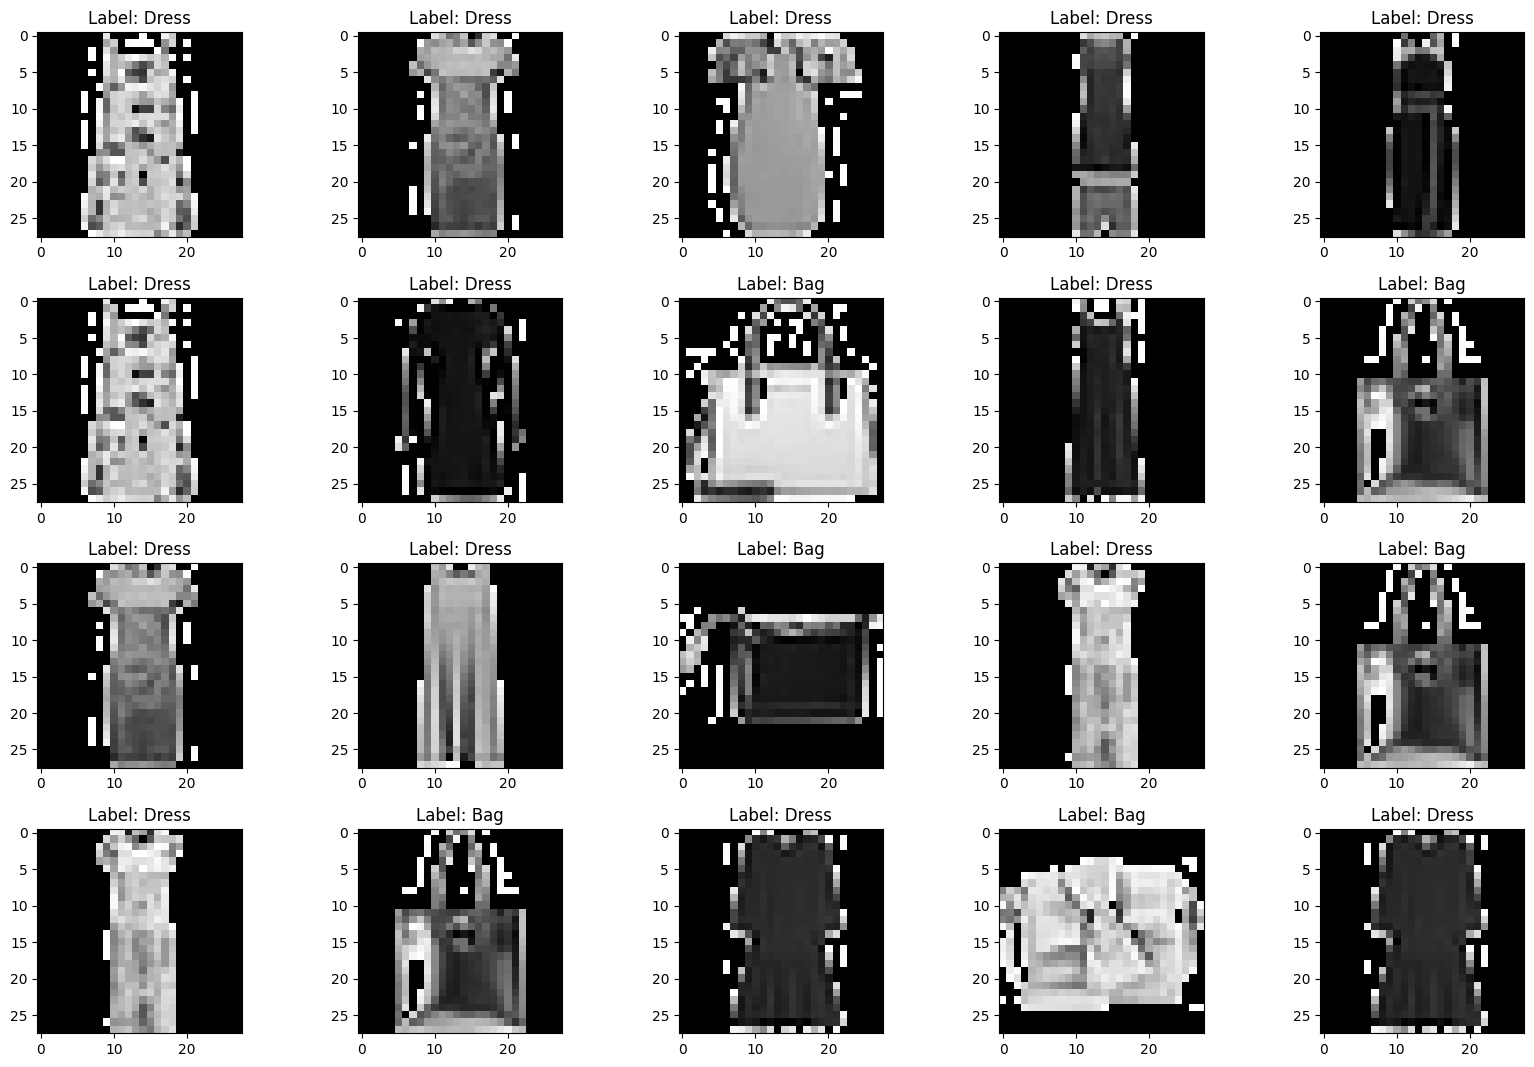

In [5]:
#A routine that you can use for plotting some of the data. 
arr = ['Bag','Dress'] # 0: Bag,  1: Dress
a = np.random.randint(1,40,20)
plt.figure(figsize=(20, 13))
for n,i in enumerate(a):
    plt.subplot(4, 5, n+1)
    two_d = (np.reshape(x_train[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Label: {0}'.format(arr[y_train[i]]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
plt.subplots_adjust(hspace = 0.3)

<h3 style="color:rgb(210,90,80)">Code 2.2 (5 points):</h3>


Your task now is to train a sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"> RandomForestClassifier</a> with the default parameters on the training data set. 

Then get the model's predictions for the test data set. Use **RSEED** as random_seed for the RandomForestClassifier.

For this, we ask you to implement a function fit_predict.

In [6]:
def fit_predict(
        x_train: np.ndarray, 
        y_train: np.ndarray, 
        x_test: np.ndarray, 
        y_test: np.ndarray, 
        rseed: int
) -> tuple[RandomForestClassifier, np.ndarray]:
    """Function fits a RandomForestClassifier on the training data and returns predictions as well as model.

    Parameters
    ----------
    x_train : np.ndarray
        Training data matrix.
    y_train : np.ndarray
        Training labels vector.
    x_test : np.ndarray
        Test data matrix.
    y_test : np.ndarray
        Test labels vector.
    rseed : int
        Random Seed used for initializing the Classifier.

    Returns
    -------
    tuple(RandomForestClassifier, np.ndarray)
        Where the classifier is the already trained classifier and the array is the predictions on x_test.
    """
    #Your code goes here ↓↓↓
    model = RandomForestClassifier(random_state=rseed)
    model.fit(x_train, y_train)
    
    prediction = model.predict(x_test)
    #Your code ends here _____________________________________________________________________________________
    
    return model, prediction

In [7]:
model, prediction = fit_predict(x_train,y_train,x_test,y_test, RSEED)

<h3 style="color:rgb(210,90,80)">Code 2.3 (15 points):</h3>

Now, within the function `get_n_items_wrong` compute and return the size of the test set and number of misclassified test samples.
Furthermore, retrieve the misclassifed samples, their actual labels and the predicted labels from the classifier.

Use your predictions to plot up to 20 test data sample(s) that were **missclassified** (there can be fewer than 20 misclassified samples as well): 

In [8]:
def get_n_items_wrong(
        x_test:
        np.ndarray, y_test:
        np.ndarray,
        prediction: np.ndarray
) -> tuple[int, int, np.ndarray, np.ndarray, np.ndarray]:
    """Calculates the size of the test set, number of misclassified samples, the samples that are misclassified,
    the actual labels that are misclassified in the prediction, and the labels that are wrong in the prediction.
    
    Parameters
    ----------
    x_test : np.ndarray
        Test data matrix.
    y_test : np.ndarray
        Test labels vector.
    prediction : np.ndarray
        The predicted labels vector from the model.
    
    Returns
    -------
    tuple(int, int, np.ndarray, np.ndarray, np.ndarray)
        Where the first two ints are the size_test and num_wrong and the arrays are the samples_wrong, labels_wrong and predictions_wrong.
    """
    # Your code goes here ↓↓↓
    size_test = len(x_test)
    num_wrong = 0
    samples_wrong = []
    labels_wrong = []
    predictions_wrong = []
    
    for i, val  in enumerate(y_test):
        if val != prediction[i]:
            num_wrong += 1
            samples_wrong.append(x_test[i])
            labels_wrong.append(val)
            predictions_wrong.append(prediction[i])
        
    samples_wrong = np.array(samples_wrong)
    labels_wrong = np.array(labels_wrong)
    predictions_wrong = np.array(predictions_wrong)
    # Your code ends here _____________________________________________________________________________________
    
    return size_test, num_wrong, samples_wrong, labels_wrong, predictions_wrong

In [9]:
#SOLUTION TO NUMBER OF WRONG PREDICTIONS
#Your code goes here ↓↓↓
size_test, num_wrong, samples_wrong, labels_wrong, predictions_wrong = get_n_items_wrong(x_test, y_test, prediction)
#Your code ends here _____________________________________________________________________________________

#Following print statement might be evaluated
print("Number of test samples: {0}\nNumber of misclassified samples: {1}".format(size_test,num_wrong))

Number of test samples: 2000
Number of misclassified samples: 11


In [10]:
def plot_wrong_predictions(samples_wrong: np.ndarray, labels_wrong: np.ndarray, predictions_wrong: np.ndarray) -> plt.Figure:
    """Function creates a figure that shows misclassified samples.

    Parameters
    ----------
    samples_wrong : np.ndarray
        The samples that got misclassified by the classifier.
    labels_wrong : np.ndarray
        The actual true labels of the misclassified samples.
    predictions_wrong : np.ndarray
        The predicted labels of the misclassified samples.

    Returns
    -------
    plt.Figure
        A matplotlib.pyplot figure object (i.e. the misclassified samples).
    """
    # Your code goes here ↓↓↓
    fig = plt.figure(figsize=(20, 13))  
    
    nr_samples = min(len(samples_wrong), 20)  
    arr = ['Bag','Dress']
    
    for i in range(nr_samples):
        plt.subplot(4, 5, i + 1)
        two_d = (np.reshape(samples_wrong[i], (28, 28)) * 255).astype(np.uint8)
        plt.title('True Label: {} \n Predicted Label: {}'.format(arr[labels_wrong[i]], arr[predictions_wrong[i]]))
        plt.imshow(two_d, cmap='gray', interpolation='nearest')  

    plt.subplots_adjust(hspace = 0.5)
    plt.show()
    # Your code ends here _____________________________________________________________________________________

    return fig

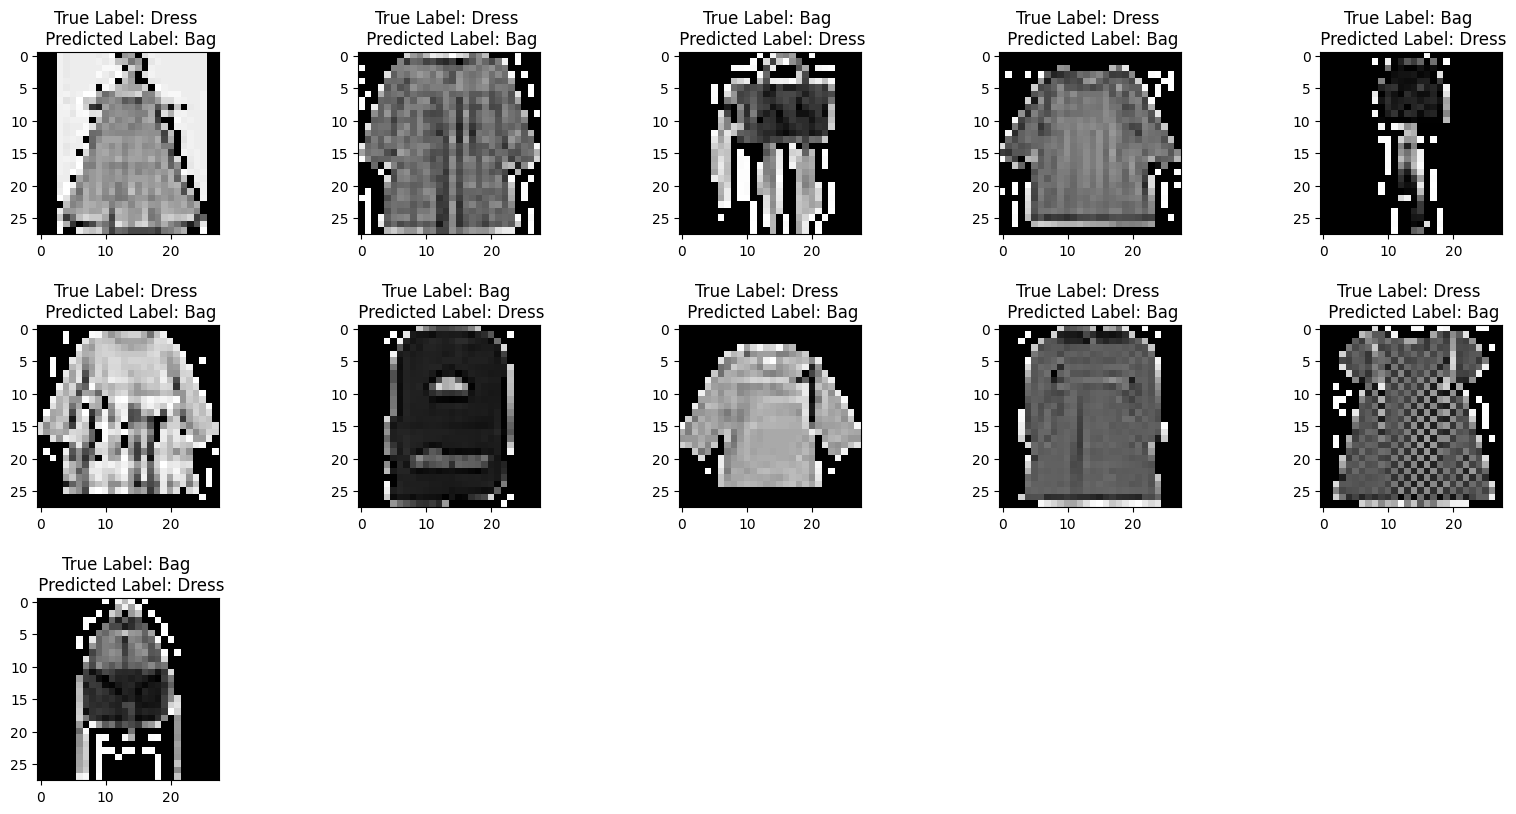

In [11]:
fig = plot_wrong_predictions(samples_wrong, labels_wrong, predictions_wrong)

<h3 style="color:rgb(210,90,80)">Code 2.4 (20 points):</h3>

Within this part we will try to see the decision-making incentives of Random Forest.

To do this we ask you to implement the following tasks:<br>
<b>Hint:</b> In the following you will have to plot heatmaps, to do this you might want to take a look at seaborn (sns): <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html">Seaborn heatmap</a>
<ol>
    <li>Take your training dataset and split it into 2: dresses and bags. <br>
    Calculate the average of the features. Reshape the averages to 2D arrays of shape 28*28 and plot them as heatmaps. Save the results under variables <b>dress_av</b> and <b>bag_av</b></li>
    <li>From the average of dresses subtract the average of bags. Save the result as in the variable <b>diff</b>. Plot it as a heatmap.</li>
    <li>Define the feature importance of the previously trained RF classifier witin the variable  <b>importances</b>. Visualize it as a heatmap and don't forget to reshape it to 28*28.<br>
    <b>Hint:</b> Check scikit-learn documentation to access feature importance.</li>
</ol>
    
The evaluation of the following code will be done by viewing your plots.<br><br>
**For those who are curious**: run RF under different seeds, and look how plots are changing.<br>
BEFORE SUBMISSION RETURN TO ORIGINAL SEED = 10

In [12]:
#PLOTTING HEATMAPS
def plot_heatmaps(x_train: np.ndarray, y_train: np.ndarray, model: RandomForestClassifier) -> plt.Figure:
    """Create plots as described in the task description above.

    Parameters
    ----------
    x_train : np.ndarray
        Training data matrix.
    y_train : np.ndarray
        Training labels vector.
    model : RandomForestClassifier
        Your already trained classifier.

    Returns
    -------
    plt.Figure
        A matplotlib.pyplot figure object (i.e. the heatmaps).
    """
    #Your code goes here ↓↓↓
    
    #Use your freestlye plotting
    
    #Step 1 Split and calculate averages
    dresses = x_train[y_train == 1]
    bags = x_train[y_train == 0]
    
    dress_av = np.mean(dresses, axis=0).reshape(28, 28)
    bag_av = np.mean(bags, axis=0).reshape(28, 28)
    
    #Step 2 Subtract 
    diff = dress_av - bag_av
    
    #Step 3 Extract feature importance
    importances = model.feature_importances_.reshape(28, 28)
    
    #Step 4 plot everything together
    fig = plt.figure(figsize=(12, 9))
    subfigs = fig.subfigures(2, 1)

    # First row subfigure
    ax1 = subfigs[0].subplots(1, 2)
    sns.heatmap(bag_av, ax=ax1[0])
    ax1[0].set_title('Average Bag')
    
    sns.heatmap(dress_av, ax=ax1[1])
    ax1[1].set_title('Average Dress')

    # Second row subfigure
    ax2 = subfigs[1].subplots(1, 2)
    sns.heatmap(diff, ax=ax2[0])
    ax2[0].set_title('Overlaps')
    
    sns.heatmap(importances, ax=ax2[1])
    ax2[1].set_title('Feature importances')
    
    #Your code ends here _____________________________________________________________________________________

    return fig

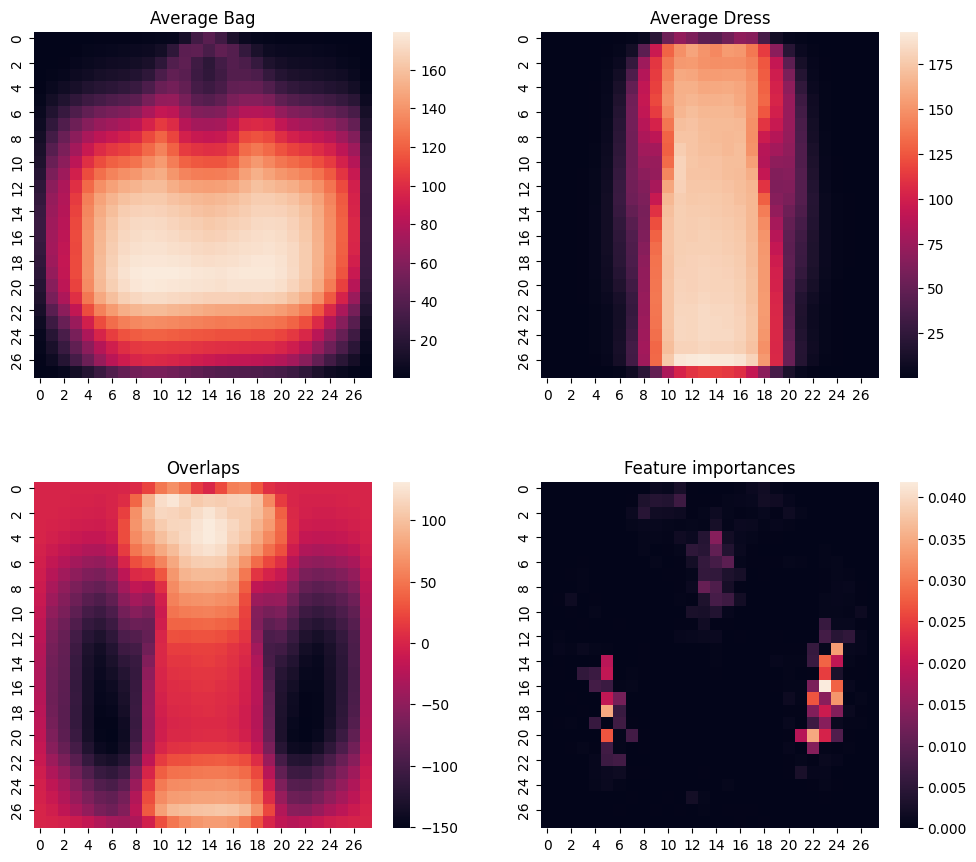

In [13]:
fig = plot_heatmaps(x_train, y_train, model)

If you have solved the previous task correctly, the resulting plot should look close to this:<br>
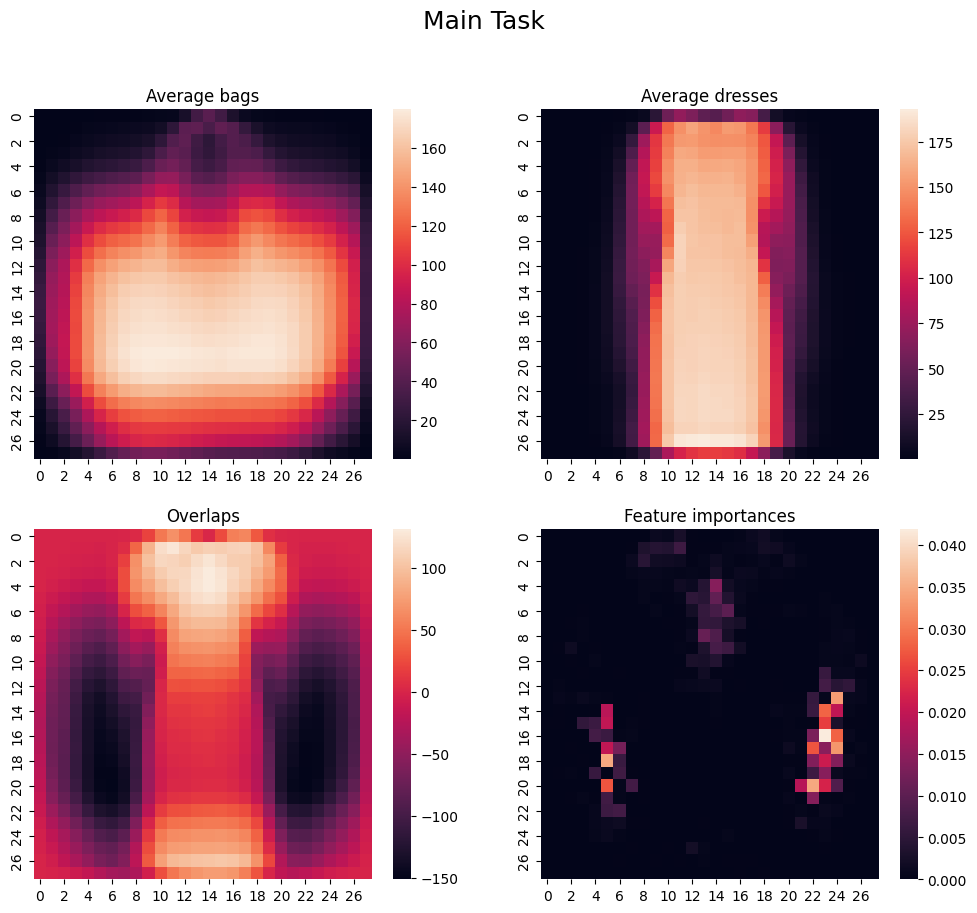

In [14]:
# You can use this cell to run RF under different seeds, if you are curious (will not be used for grading).

<h3 style="color:rgb(210,90,80)">Question (5 points):</h3>

What observations can you make? 
<br>(Multiple answers might be correct)

To answer the question assign to variables in the nex cell **True** or **False** boolean values. 
To earn points **assign values to all variables**.<br>
**NOTE** Do not reuse these variable names. They are used for testing.
    
a_) RF achieves an accuracy higher than 90% on the test set.<br>
b_) The most important features are located in image regions that primarily show either only bags or dresses as depicted by the plots of average bags and dresses.<br>
c_) If one pixel would always be bright for bags but never for dresses, the RF classifier would certainly learn to use only this pixel as a feature.<br>
d_) Comparing the misclassified bags to other bags suggests that they might be outliers as they are rather tall, but not as long as most other bags.

In [15]:
#examples for you
example_of_true_variable = True
example_of_false_variable = False

#your answers go here ↓↓↓
a_=True
b_=True
c_=False
d_=True

In [16]:
# this cell and the next one can help you as a sanity check of your implementation
def filter_tl(xt,yt,xte,yte,labels_list):
    try:
        xtf, ytf, xtef, ytef = _filter_(xt,yt,xte,yte,labels_list)
        res = (xtf.tolist(), ytf.tolist(), xtef.tolist(), ytef.tolist())
        print('Filtering works')
        return res
    except Exception as e:
        print("Execution of _filter_, or convertion from np.array to list failed")
        print(e)
        raise ValueError()
        
def model_param(xt,yt,xte,yte):
    try:
        model, pred = fit_predict(xt,yt,xte,yte,RSEED)
        nfeat = model.n_features_in_
        nclass = model.n_classes_
        print("Model is valid object")
        return nfeat,nclass
    except Exception as e:
        print("Execution of fit_predict, or model parameters extraction failed")
        print(e)
        raise ValueError()
        
def testoptions(options):
    for elem in options:
        if elem!=True and elem!=False and elem!=None:
            raise ValueError(f"Check answers for questions again")
    print("Test questions answers are ok")

In [17]:
#these are dummy inputs, your code should be runnable on such
xt,yt,xte,yte = np.array([[1,1,1],[9,9,9],[5,5,5]]),np.array([1,9,5]),np.array([[0,0,0],[1,1,1],[9,9,9]]),np.array([0,1,9])

xt,yt,xte,yte = filter_tl(xt,yt,xte,yte,[1,9])
model_param(xt,yt,xte,yte)
testoptions(np.array([a_,b_,c_,d_]))
print('Executable')

Filtering works
Model is valid object
Test questions answers are ok
Executable
